In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import difflib

In [2]:
!pip3 install pyprind

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()

In [4]:
url = "https://raw.githubusercontent.com/BenPigger/MLProjectReak/main/enron_spamupd2.csv"

In [5]:
df = pd.read_csv(url, encoding='unicode_escape')

In [6]:
df.head()

,Subject,Message,Spam/Ham
0,christmas tree farm pictures,NaN,0.0
1,"vastar resources , inc .","gary , production from the high island larger ...",0.0
2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,0.0
3,re : issue,fyi - see note below - already done .\nstella\...,0.0
4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,0.0


In [7]:
df = df.dropna()
df.head()

,Subject,Message,Spam/Ham
1,"vastar resources , inc .","gary , production from the high island larger ...",0.0
2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,0.0
3,re : issue,fyi - see note below - already done .\nstella\...,0.0
4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,0.0
5,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",0.0


In [8]:
df.shape

(14584, 3)

In [9]:
X = df["Subject"] + df["Message"]

In [10]:
X[1]

'vastar resources , inc .gary , production from the high island larger block a - 1 # 2 commenced on\nsaturday at 2 : 00 p . m . at about 6 , 500 gross . carlos expects between 9 , 500 and\n10 , 000 gross for tomorrow . vastar owns 68 % of the gross production .\ngeorge x 3 - 6992\n- - - - - - - - - - - - - - - - - - - - - - forwarded by george weissman / hou / ect on 12 / 13 / 99 10 : 16\nam - - - - - - - - - - - - - - - - - - - - - - - - - - -\ndaren j farmer\n12 / 10 / 99 10 : 38 am\nto : carlos j rodriguez / hou / ect @ ect\ncc : george weissman / hou / ect @ ect , melissa graves / hou / ect @ ect\nsubject : vastar resources , inc .\ncarlos ,\nplease call linda and get everything set up .\ni \' m going to estimate 4 , 500 coming up tomorrow , with a 2 , 000 increase each\nfollowing day based on my conversations with bill fischer at bmar .\nd .\n- - - - - - - - - - - - - - - - - - - - - - forwarded by daren j farmer / hou / ect on 12 / 10 / 99 10 : 34\nam - - - - - - - - - - - - - - 

In [11]:
Y = df["Spam/Ham"]

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
def tokenizer_porter(text):
  return [porter.stem(word) for word in text.split()]

In [14]:
import re
def preprocessor(text):
  text = re.sub('<[^>]*>', '', text)
  emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
  text = re.sub('[\W]+', ' ', text.lower()) + \
         ' '.join(emoticons).replace('-', '')
  text = [band for band in tokenizer_porter(text) if band not in stop]
  text = ' '.join(text)
  return text

In [15]:
X = X.apply(preprocessor)

In [16]:
X[1]

'vastar resourc inc gari product high island larger block 1 2 commenc saturday 2 00 p 6 500 gross carlo expect 9 500 10 000 gross tomorrow vastar 68 gross product georg x 3 6992 forward georg weissman hou ect 12 13 99 10 16 daren j farmer 12 10 99 10 38 carlo j rodriguez hou ect ect cc georg weissman hou ect ect melissa grave hou ect ect subject vastar resourc inc carlo pleas call linda get everyth set go estim 4 500 come tomorrow 2 000 increas follow day base convers bill fischer bmar forward daren j farmer hou ect 12 10 99 10 34 enron north america corp georg weissman 12 10 99 10 00 daren j farmer hou ect ect cc gari bryan hou ect ect melissa grave hou ect ect subject vastar resourc inc darren attach appear nomin vastar resourc inc high island larger block 1 2 previous erron refer 1 well vastar expect well commenc product sometim tomorrow told linda harri get telephon number ga control provid notif turn tomorrow linda number record 281 584 3359 voic 713 312 1689 fax would pleas see s

In [17]:
msg_vector = count.fit_transform(X)

In [18]:
msg_vector.shape

(14584, 72759)

In [19]:
msg_vector

<14584x72759 sparse matrix of type '<class 'numpy.int64'>'
	with 1182482 stored elements in Compressed Sparse Row format>

In [20]:
print(count.vocabulary_)

{'vastar': 67960, 'resourc': 56094, 'inc': 35550, 'gari': 30517, 'product': 53068, 'high': 33663, 'island': 36958, 'larger': 39892, 'block': 14716, 'commenc': 19590, 'saturday': 58017, '00': 0, '500': 4940, 'gross': 32116, 'carlo': 17030, 'expect': 27733, '10': 761, '000': 1, 'tomorrow': 65159, '68': 6165, 'georg': 30919, '6992': 6319, 'forward': 29582, 'weissman': 69747, 'hou': 34260, 'ect': 25419, '12': 1078, '13': 1216, '99': 8390, '16': 1711, 'daren': 22093, 'farmer': 28198, '38': 4087, 'rodriguez': 57001, 'cc': 17407, 'melissa': 43588, 'grave': 31936, 'subject': 62412, 'pleas': 51603, 'call': 16600, 'linda': 40803, 'get': 31015, 'everyth': 27504, 'set': 59119, 'go': 31512, 'estim': 27247, 'come': 19520, 'increas': 35659, 'follow': 29331, 'day': 22254, 'base': 13182, 'convers': 20477, 'bill': 14330, 'fischer': 28951, 'bmar': 14826, '34': 3719, 'enron': 26528, 'north': 47189, 'america': 10467, 'corp': 20688, 'bryan': 15833, 'darren': 22120, 'attach': 12180, 'appear': 11277, 'nomin':

In [21]:
print(msg_vector.toarray())

[[ 2 18  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [22]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
np.set_printoptions(precision=4)

In [23]:
print(tfidf.fit_transform(msg_vector).toarray())

[[0.0347 0.3224 0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 ...
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]]


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X.shape

(14584,)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=17)

In [27]:
X_train.shape

(10208,)

In [28]:
X_train

,0
6101,1 00 pm tomorrow lauren 1 00 p fine 713 853 38...
1185,enron hpl actual juli 12 2000teco tap 10 000 e...
8216,interview schedul punit rawalshirley touch pun...
6445,interview research groupgood morn toni researc...
6379,loan recommend formli shall take care thursday...
...,...
9677,congratul 6 new signupsw guarante free signup ...
410,calpin daili ga nominationa spoke thi morn cal...
13856,healthi reproduct lifeour custom speak volum s...
2196,fw box bed origin messag carol covington sent ...


In [29]:
keywords = ["urgent", "free", "drugs", "money","congratulations"]

In [30]:
keywords = [preprocessor(word) for word in keywords]
keywords

['urgent', 'free', 'drug', 'money', 'congratul']

In [31]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer

def get_keyword_features(X):
    keyword_features = []
    for text in X:
        features = [1 if word in text.lower() else 0 for word in keywords]
        keyword_features.append(features)
    return np.array(keyword_features)

#Turns the keyword function into transformer so it can be used in the pipeline
keyword_transformer = FunctionTransformer(get_keyword_features, validate=False)

pipeline = Pipeline([
    ('features', FeatureUnion([
        ('tfidf', TfidfVectorizer()),
        ('keywords', keyword_transformer)
    ])),
    ('clf', SVC(kernel='linear', probability=True, random_state=0))
])

In [32]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('tfidf', TfidfVectorizer()),
                                                ('keywords',
                                                 FunctionTransformer(func=<function get_keyword_features at 0x7c07a6632680>))])),
                ('clf',
                 SVC(kernel='linear', probability=True, random_state=0))])

In [33]:
from sklearn.metrics import accuracy_score
threshold = 0.6
prob = pipeline.predict_proba(X_test)
pred = (prob[:,1] >= threshold).astype(int)
print("Accuracy: " + str(accuracy_score(y_test, pred)*100) + "%")

Accuracy: 99.38299817184644%


In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[2422,   11],
       [  16, 1927]])

Text(50.722222222222214, 0.5, 'Actual')

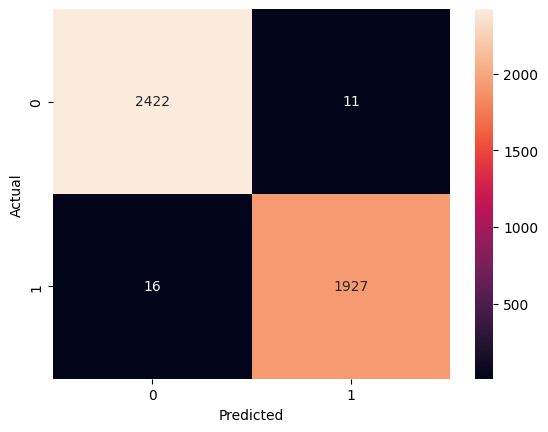

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Actual")